<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 10 | Descritiva II - Análise descritiva para resposta contínua | Exercício 1
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [19]:
df.count().isna()

Unnamed: 0               False
data_ref                 False
index                    False
sexo                     False
posse_de_veiculo         False
posse_de_imovel          False
qtd_filhos               False
tipo_renda               False
educacao                 False
estado_civil             False
tipo_residencia          False
idade                    False
tempo_emprego            False
qt_pessoas_residencia    False
mau                      False
renda                    False
dtype: bool

In [22]:
df.duplicated().sum()

0

In [30]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [46]:
# Matriz de correlação

df[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


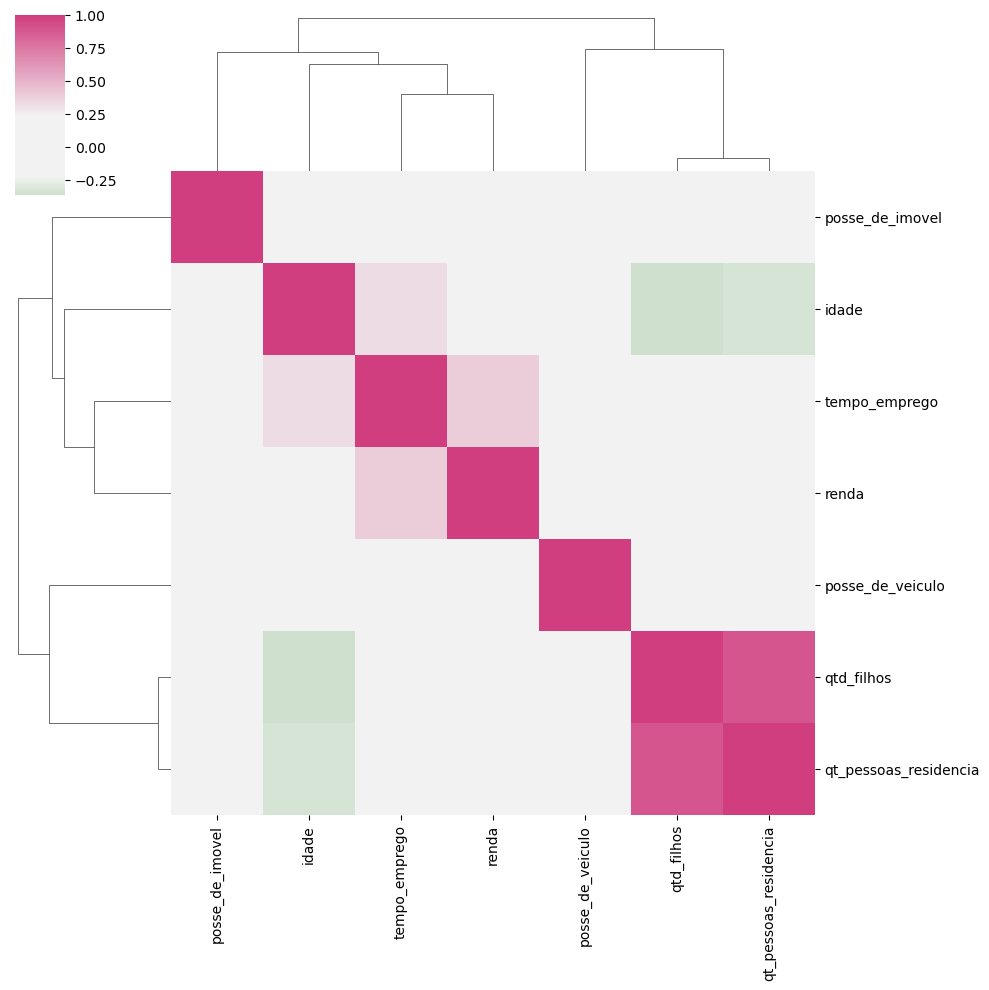

In [45]:
# Clustermap

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df[['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].corr(), figsize=(10, 10), center = 0, cmap=cmap)

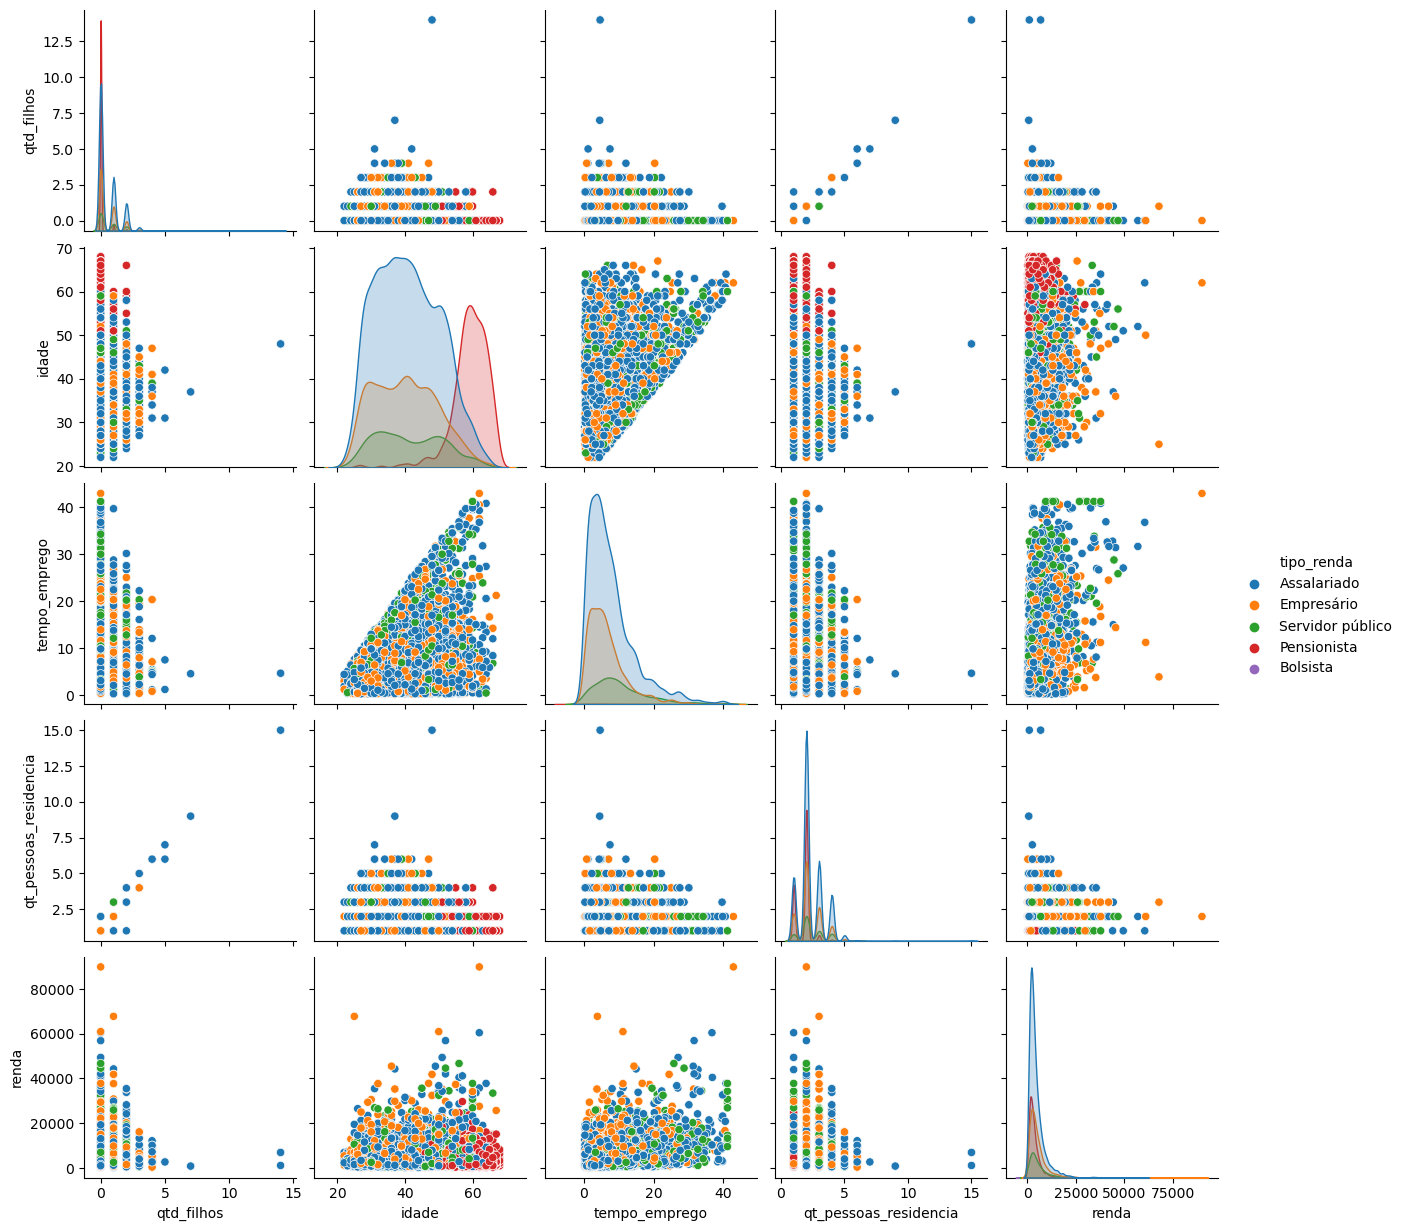

In [44]:
# Matriz de dispersão

sns.pairplot(df,
            hue='tipo_renda', 
             vars=['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'])

As variáveis que apresentam grau de correlação mais forte, ou seja, mais afastado do zero são:

» Quantidade de pessoas na residência e quantidade de filhos; <br>
» Idade e quantidade de filhos; <br>
» Idade e tempo de emprego; <br>
» Idade e quantidade de pessoas na residência; <br>
» Tempo de emprego e renda. <br>

Esses fenômenos podem ser observados pelos gráficos: Matriz de correlação e Clustermap.<br>
Ainda, é possível observar que apenas a variável ```tempo_emprego``` apresenta um índice de correlação satisfatório para análise com a variável renda.<br>
Pelo gráfico de Matriz de dispersão (pairplot) é possível visualizar que a variável ```renda``` possui outliers quando a renda é proveniente de empresário.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='idade', ylabel='renda'>

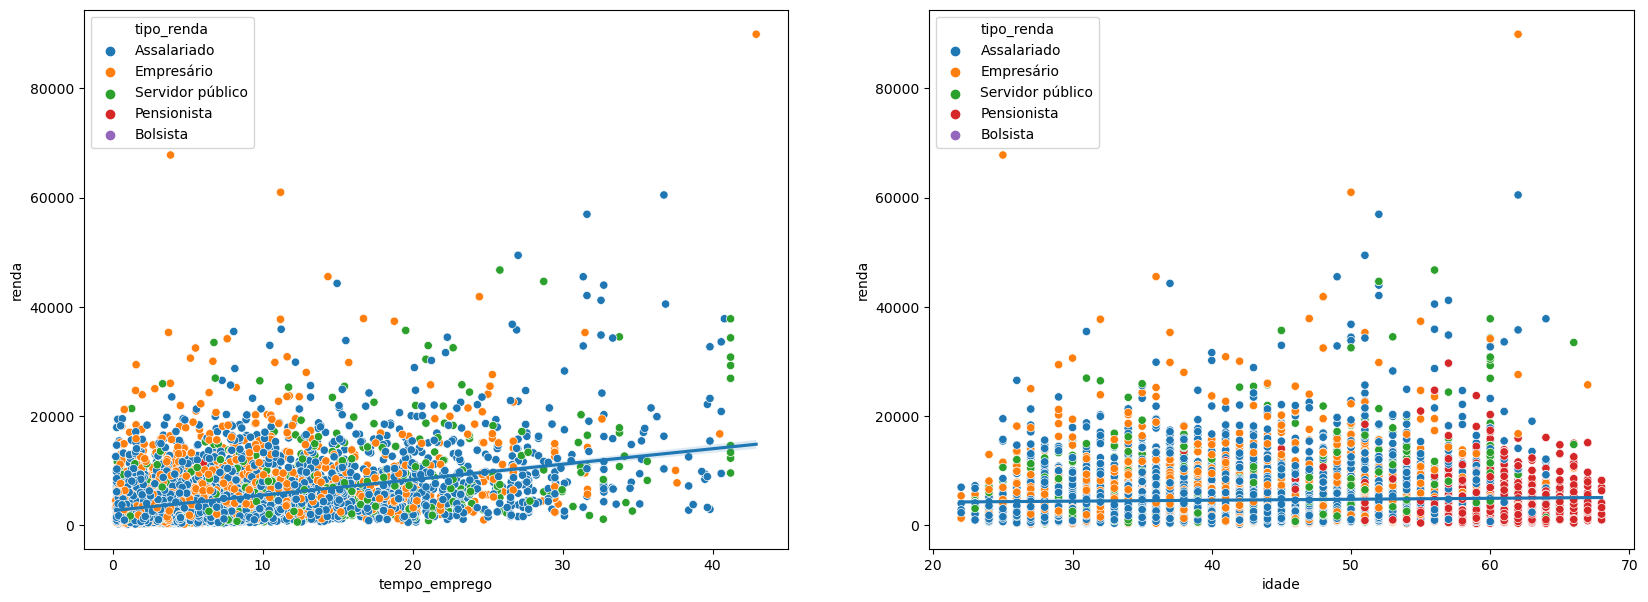

In [85]:
plt.rc('figure', figsize=(20, 7))
fig, axes = plt.subplots(1,2)

sns.scatterplot(ax = axes[0],  x='tempo_emprego', y='renda', hue='tipo_renda', data=df)
sns.scatterplot(ax = axes[1],  x='idade', y='renda', hue='tipo_renda', data=df)
sns.regplot(ax = axes[0],  x='tempo_emprego', y='renda', data=df, scatter=False)
sns.regplot(ax = axes[1],  x='idade', y='renda', data=df, scatter=False)

3) Na su aopinião, há outliers na variável renda?

Sim, há outliers na variável ```renda``` quando o tipo de renda é de empresário.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='idade', ylabel='renda'>

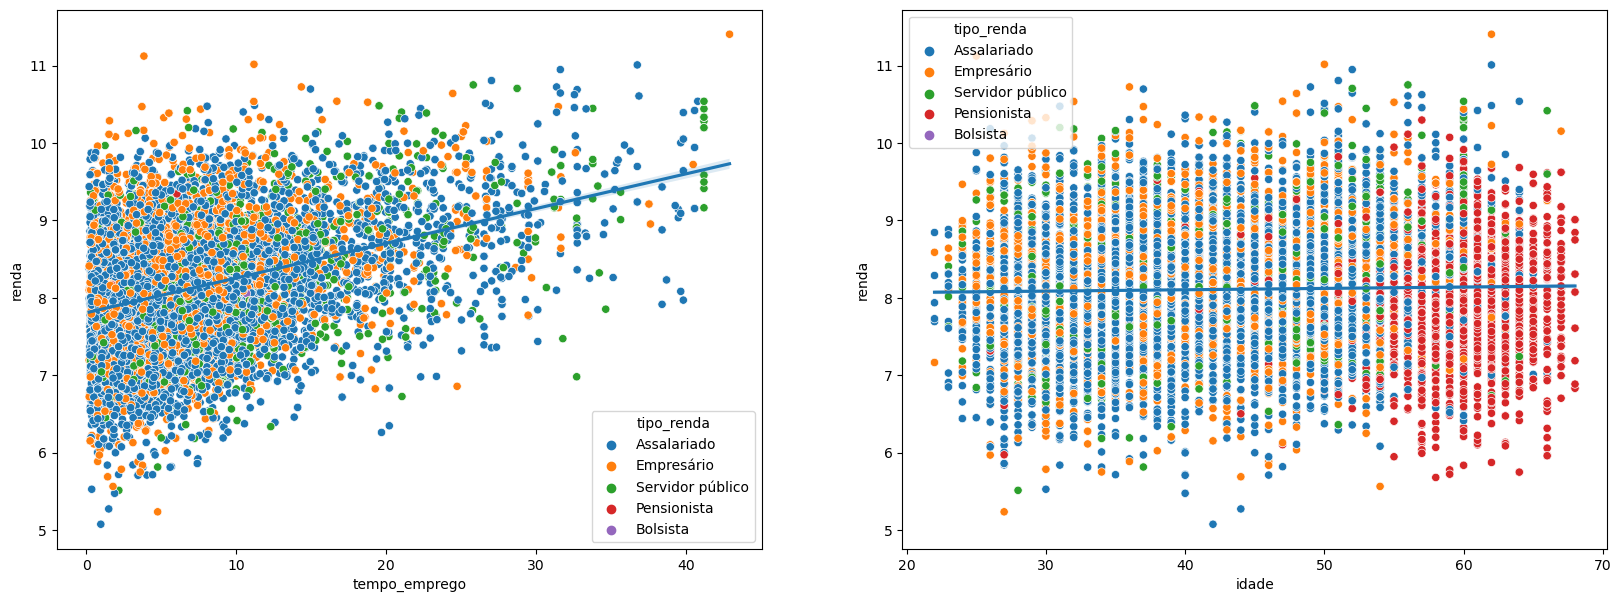

In [92]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.rc('figure', figsize=(20,7))
fig, axes = plt.subplots(1, 2)

sns.scatterplot(ax = axes[0], x='tempo_emprego', y='renda', hue='tipo_renda', data = df_log)
sns.scatterplot(ax = axes[1], x='idade', y='renda', hue='tipo_renda', data = df_log)
sns.regplot(ax = axes[0], x='tempo_emprego', y='renda', data = df_log, scatter=False)
sns.regplot(ax = axes[1], x='idade', y='renda', data = df_log, scatter=False)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do LOG fez com que as variáveis se concentrassem. Principalmente em relação a variável ```idade```, onde é possível visualizar com maior clareza. Sendo assim, a aplicação do LOG melhorou a análise.